In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [45]:
with open("train_df.pkl","rb") as file:
  train_df = pickle.load(file)

In [46]:
train_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned,Exited
9254,686,France,Male,32,6,0.00,2,1,1,179093.26,0,2,DIAMOND,510,0
1561,632,Germany,Male,42,4,119624.60,2,1,1,195978.86,0,4,PLATINUM,959,0
1670,559,Spain,Male,24,3,114739.92,1,1,0,85891.02,1,4,SILVER,327,1
6087,561,France,Female,27,9,135637.00,1,1,0,153080.40,1,2,SILVER,567,1
6669,517,France,Male,56,9,142147.32,1,0,0,39488.04,1,3,PLATINUM,727,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,768,France,Male,54,8,69712.74,1,1,1,69381.05,0,3,SILVER,569,0
5191,682,France,Female,58,1,0.00,1,1,1,706.50,0,4,PLATINUM,709,0
5390,735,France,Female,38,1,0.00,3,0,0,92220.12,1,5,SILVER,678,1
860,667,France,Male,43,8,190227.46,1,1,0,97508.04,1,3,DIAMOND,680,1


In [47]:
train_df['Point Earned'].value_counts()

Point Earned
709    23
615    20
408    20
351    20
791    19
       ..
714     3
819     3
996     1
206     1
163     1
Name: count, Length: 784, dtype: int64

In [48]:
for i in train_df.select_dtypes(exclude='object'):
  print(f"{i} : {train_df[i].nunique()}")

CreditScore : 457
Age : 67
Tenure : 11
Balance : 5082
NumOfProducts : 4
HasCrCard : 2
IsActiveMember : 2
EstimatedSalary : 7999
Complain : 2
Satisfaction Score : 5
Point Earned : 784
Exited : 2


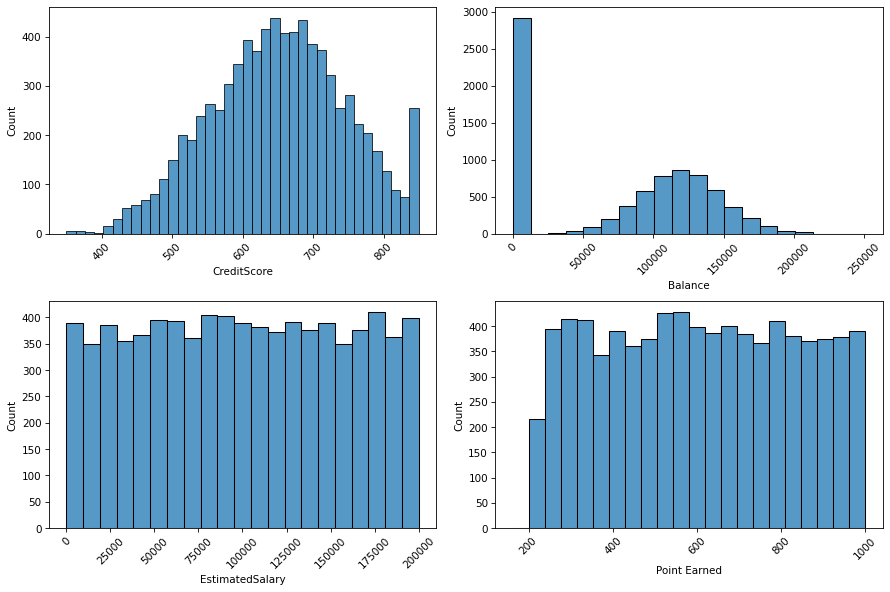

In [49]:
 plt.figure(figsize=(12,8),dpi=75)
 for plot,i in enumerate(['CreditScore','Balance','EstimatedSalary','Point Earned']):
  plt.subplot(2,2,plot+1)
  sns.histplot(train_df[i])
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

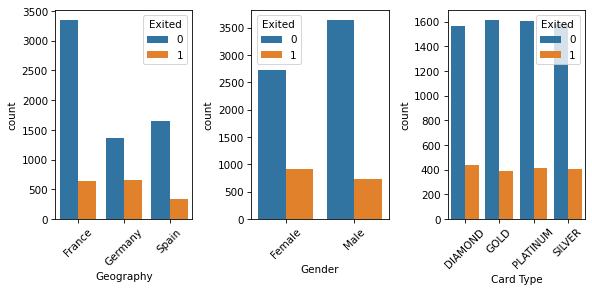

In [50]:
# Categorical distribution
plt.figure(figsize=(8,4),dpi=75)
for plot,i in enumerate(['Geography','Gender','Card Type']):
  data = train_df.groupby(by=[i,'Exited'])['Exited'].value_counts().reset_index()
  x = data[i]
  y = data['count']
  hue = data['Exited']
  plt.subplot(1,3,plot+1)
  sns.barplot(x=x,y=y,hue=hue)
  plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [51]:
X_train = train_df.drop('Exited',axis=1)
y_train = train_df['Exited']

In [52]:
# encoding
encoder_dict = {}
for i in X_train.select_dtypes('object'):
  encoder = LabelEncoder()
  X_train[i] = encoder.fit_transform(X_train[i])
  encoder_dict[i] = encoder

with open ("encoder_dict.pkl","wb") as file:
  pickle.dump(encoder_dict,file)


In [53]:
# Scaling
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
with open("scaler.pkl","wb") as file:
  pickle.dump(scaler,file)


In [54]:
model = RandomForestClassifier(random_state=11,max_depth=8)
model.fit(X_train,y_train)
score = model.score(X_train,y_train)
print("Score : ",score)

Score :  0.999


In [55]:
with open("model.pkl","wb") as file:
  pickle.dump(model,file)